In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf  # Connects Plotly to Pandas

# Makes Plotly work in Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()


In [4]:
# Setup the data
# csv file from yahoo finance page: https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD
df_1 = pd.read_csv('BTC-USD.csv', index_col='Date', parse_dates=True)
# verify index is datetimeindex
df_1.index

DatetimeIndex(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
               '2020-08-09', '2020-08-10',
               ...
               '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-07-31', '2021-08-01'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

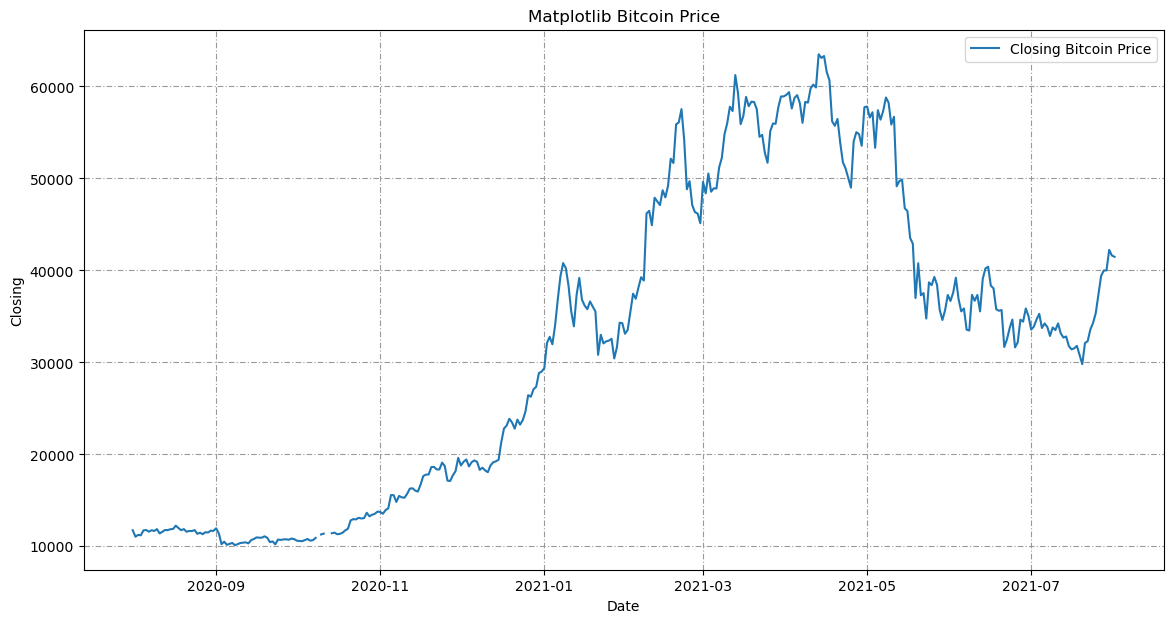

In [5]:
# Visualisations
# Matplotlib
fig_1 = plt.figure(figsize=(12, 6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Bitcoin Price')
axes_1.plot(df_1.index, df_1['Close'], label='Closing Bitcoin Price')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5, 2, 1, 2))


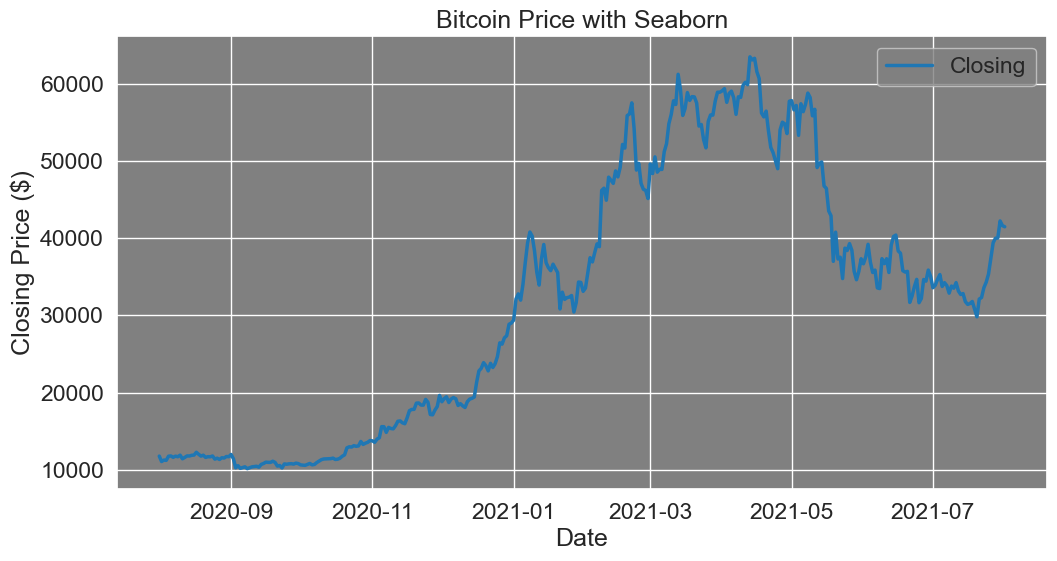

In [9]:
# Seaborn
fig_3 = plt.figure(figsize=(12, 6), dpi=100)
axes_2 = sns.lineplot(data=df_1, x=df_1.index, y='Close', label='Closing')
axes_2.set(xlabel='Date', ylabel='Closing Price ($)')
axes_2.set_title('Bitcoin Price with Seaborn')
axes_2.legend(loc=0)
sns.set_style('darkgrid', {'axes.facecolor': '.5'})
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

In [10]:
# Plotly

fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_1.index, y=df_1['Close'], mode='lines', name='Closing Price'))
fig_2.update_layout(xaxis=dict(showgrid=True, showline=True, showticklabels=True), 
                    yaxis=dict(showgrid=True, showline=True, showticklabels=True), 
                    showlegend=True,
                    xaxis_title='Date',
                    yaxis_title='Closing Price',
                    title='Plotly Bitcoing Price')

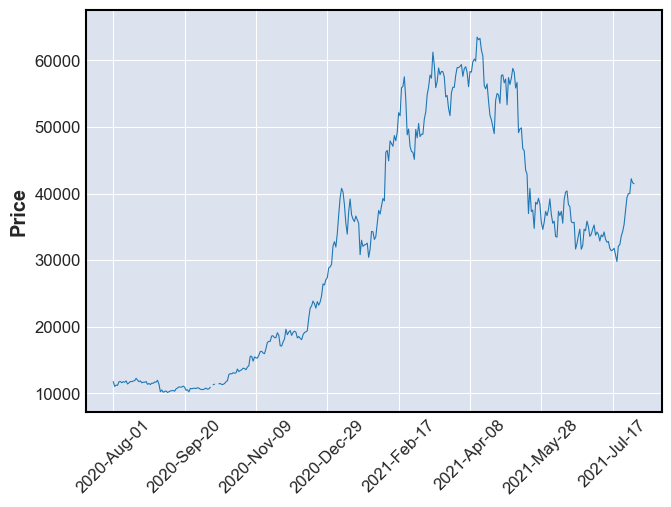

In [11]:
# Matplotlib finance

mpf.plot(df_1, type='line')

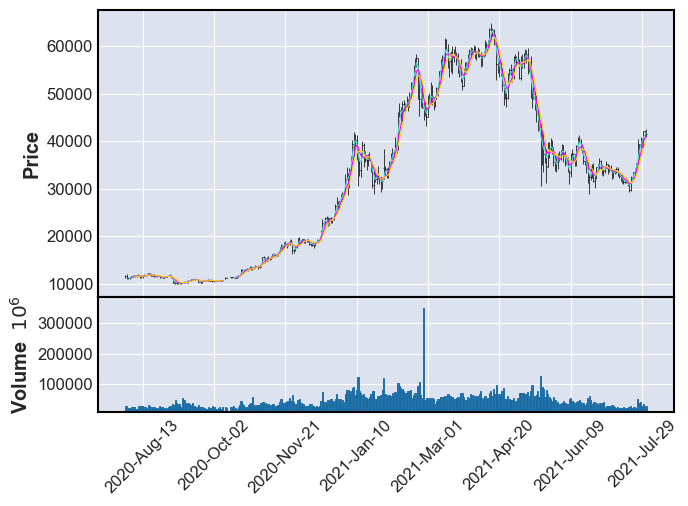

In [13]:
mpf.plot(df_1, type='ohlc', mav=(3, 5, 7), volume=True, show_nontrading=True)

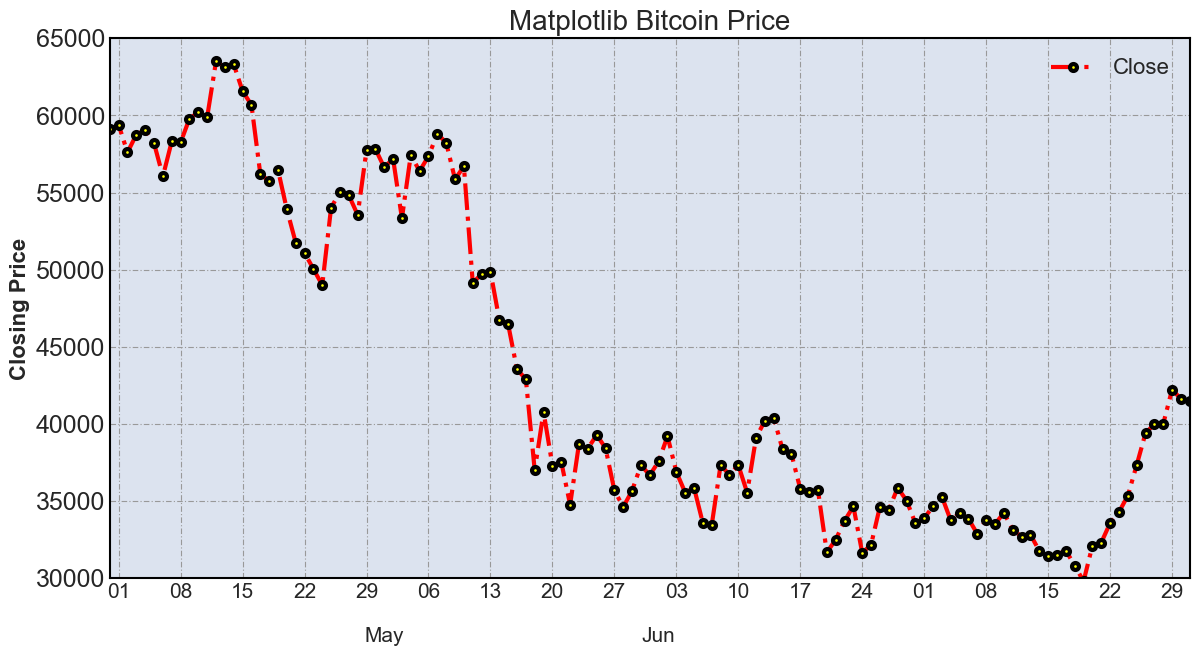

In [32]:
# Plotting time periods and styling with Matplotlib
fig_1 = plt.figure(figsize=(12, 7), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Bitcoin Price', fontsize=20)

df_1['Close'].plot(figsize=(12, 6), 
                    xlim=['2021-04-01', '2021-08-01'], 
                    ylim=[30000, 65000], 
                    color='red', 
                    lw=3,
                    ls='-.',
                    marker='o',
                    markersize=5,
                    markerfacecolor='yellow',
                    markeredgecolor='black',
                    markeredgewidth=3)
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5, 2, 1, 2))
axes_1.tick_params(axis='x', labelsize=15)
axes_1.tick_params(axis='y', labelsize=18)

plt.xlabel('', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)

plt.legend(loc=0, prop={'size': 16})

axes_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
axes_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))
axes_1.xaxis.set_minor_locator(dates.MonthLocator())
axes_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

axes_1.tick_params(axis='both', which='minor', labelsize=15)

